# 1.DATA

## 1.1 BASE URL 

In [1]:
import requests # type: ignore
import json
import pandas as pd
import csv
import numpy as np
BASE_URL="http://ergast.com/api/f1"

   


## 1.2 Result F1 match from 2020 to 2024

In [ ]:
DATA=[]
for year in range(2020,2025):
    for round in range(17):
        try:
            response=requests.get(f"{BASE_URL}/{year}/{round}/results.json")
            if(response.status_code==200):
                data=response.json() 
            DATA.append(data) 
            with open(f"RAW_DATA/Result_F1_matches.json", 'w', encoding='utf-8') as file:
                json.dump(DATA, file, ensure_ascii=False, indent=4)
        except requests.exceptions.Timeout:
            print("Timeout error")
        except requests.RequestException as e:
            print(f"Request error: {e}")

## 1.3 Profile of F1 players

In [52]:
DATA=[]
for year in range(2020,2025):
    try:
        response=requests.get(f"{BASE_URL}/{year}/drivers.json")
        if(response.status_code==200):
            data=response.json()
        DATA.append(data)  
        with open("RAW_DATA/Profile_F1_players.json", 'w', encoding='utf-8') as file:
                json.dump(DATA, file, ensure_ascii=False, indent=4)
    except requests.exceptions.Timeout:
        print("Timeout error")
    except requests.RequestException as e:
        print(f"Request error: {e}")

## 1.4 Ranking F1 players each year

In [ ]:
DATA=[]
for year in range(2020,2025):
    try:
        response=requests.get(f"{BASE_URL}/{year}/driverStandings.json")
        if(response.status_code==200):
            data=response.json()
        DATA.append(data)  
        with open(f"RAW_DATA/DriveStanding_F1_players.json", 'w', encoding='utf-8') as file:
            json.dump(DATA, file, ensure_ascii=False, indent=4)
    except requests.exceptions.Timeout:
        print("Timeout error")
    except requests.RequestException as e:
        print(f"Request error: {e}")

## 1.5 Pitstop information of each F1 player between 2020 and 2024

In [ ]:
DATA=[]
for year in range(2020,2025):
    for round in range(17):
        try:
            response=requests.get(f"{BASE_URL}/{year}/{round}/pitstops.json")
            if(response.status_code==200):
                data=response.json() 
            DATA.append(data) 
            with open(f"RAW_DATA/Pitstop.json", 'w', encoding='utf-8') as file:
                json.dump(DATA, file, ensure_ascii=False, indent=4)
        except requests.exceptions.Timeout:
            print("Timeout error")
        except requests.RequestException as e:
            print(f"Request error: {e}")

## 1.6 Qualifying Results of F1 player each season from 2020 to 2024

In [ ]:
DATA=[]
for year in range(2020,2025):
    for round in range(17):
        try:
            response=requests.get(f"{BASE_URL}/{year}/{round}/qualifying.json")
            if(response.status_code==200):
                data=response.json() 
            DATA.append(data) 
            with open(f"RAW_DATA/Qualifying_information.json", 'w', encoding='utf-8') as file:
                json.dump(DATA, file, ensure_ascii=False, indent=4)
        except requests.exceptions.Timeout:
            print("Timeout error")
        except requests.RequestException as e:
            print(f"Request error: {e}")

# 2.GETTING RAW DATA

In [2]:
with open(f"RAW_DATA/Result_F1_matches.json", "r") as json_file:
        result_data = json.load(json_file)  

In [3]:
with open("RAW_DATA/Profile_F1_players.json", "r") as json_file:
        player_data = json.load(json_file) 

In [4]:
with open(f"RAW_DATA/DriveStanding_F1_players.json", "r") as json_file:
        driveStanding_data=json.load(json_file)

In [5]:
with open(f"RAW_DATA/Pitstop.json", "r") as json_file:
        pitstop_data = json.load(json_file) 

In [6]:
with open(f"RAW_DATA/Qualifying_information.json", "r") as json_file:
        qualifying_data = json.load(json_file) 

# 3.DATA PREPROCESSING

## 3.1 Some information about drivers and constructors

In [7]:

List_driver=set()
columns=["ID"]
for information in player_data:
    for detail in information["MRData"]["DriverTable"]["Drivers"]:
        List_driver.add(detail["driverId"])
List_driver_table=pd.DataFrame(List_driver,columns=columns)
List_driver_table.to_csv("CLEAN_DATA/List_driver.csv",index=False, encoding='utf-8')
print(List_driver_table)

                   ID
0              stroll
1                ocon
2             leclerc
3              aitken
4               perez
5     mick_schumacher
6                zhou
7               kvyat
8              alonso
9               sainz
10    kevin_magnussen
11            tsunoda
12           de_vries
13     max_verstappen
14            mazepin
15             lawson
16         giovinazzi
17             norris
18           hamilton
19             vettel
20              gasly
21          ricciardo
22         hulkenberg
23             bottas
24            russell
25          raikkonen
26          colapinto
27              albon
28             kubica
29            piastri
30            bearman
31           sargeant
32             latifi
33  pietro_fittipaldi
34           grosjean


In [8]:
List_of_constructor=set()
for information in result_data:
    for detail in information["MRData"]["RaceTable"]["Races"]:
        result=detail["Results"]
        for i in range(len(result)):
            List_of_constructor.add(result[i]["Constructor"]["constructorId"])
print(List_of_constructor)

{'rb', 'alphatauri', 'williams', 'aston_martin', 'ferrari', 'renault', 'sauber', 'alfa', 'alpine', 'mercedes', 'mclaren', 'haas', 'red_bull', 'racing_point'}


In [9]:
Constructor_table=pd.DataFrame(List_of_constructor,columns=["ConstructorId"])
Constructor_table.to_csv("CLEAN_DATA/List_constructor.csv",index=False, encoding='utf-8')
print(Constructor_table)

   ConstructorId
0             rb
1     alphatauri
2       williams
3   aston_martin
4        ferrari
5        renault
6         sauber
7           alfa
8         alpine
9       mercedes
10       mclaren
11          haas
12      red_bull
13  racing_point


## 3.2 Driver Ranking

In [10]:
total_point={}
for information in driveStanding_data:
    for detail in information["MRData"]["StandingsTable"]["StandingsLists"]:
        season=detail["season"]
        for i in range(len(detail["DriverStandings"])):
             total_point[detail["DriverStandings"][i]["Driver"]["driverId"],season]=[detail["DriverStandings"][i]["points"],detail["DriverStandings"][i]["wins"]]
list_total_point=[[],[],[],[],[]]
for key, value in total_point.items():
    list_total_point[int(key[1])-2020].append([key[0],key[1],value[0],value[1]])
column=["DriverID","Year","Score","Win"]
for index in range(len(list_total_point)):
    with open("CLEAN_DATA/Rank_driver.csv", mode="a", encoding="utf-8", newline="") as file:
        writer = csv.writer(file)
        writer.writerows(list_total_point[index]) 

        

In [11]:
Total_point_table_0=pd.DataFrame(list_total_point[0],columns=column)
sum_score_2020=[]
for index in range(len(list_total_point[0])):
    sum_score_2020.append(float(list_total_point[0][index][2]))
median_score_2020=np.median(sum_score_2020)
print(Total_point_table_0)  

             DriverID  Year Score Win
0            hamilton  2020   347  11
1              bottas  2020   223   2
2      max_verstappen  2020   214   2
3               perez  2020   125   1
4           ricciardo  2020   119   0
5               sainz  2020   105   0
6               albon  2020   105   0
7             leclerc  2020    98   0
8              norris  2020    97   0
9               gasly  2020    75   1
10             stroll  2020    75   0
11               ocon  2020    62   0
12             vettel  2020    33   0
13              kvyat  2020    32   0
14         hulkenberg  2020    10   0
15          raikkonen  2020     4   0
16         giovinazzi  2020     4   0
17            russell  2020     3   0
18           grosjean  2020     2   0
19    kevin_magnussen  2020     1   0
20             latifi  2020     0   0
21             aitken  2020     0   0
22  pietro_fittipaldi  2020     0   0


In [12]:
Total_point_table_1=pd.DataFrame(list_total_point[1],columns=column)
sum_score_2021=[]
for index in range(len(list_total_point[1])):
    sum_score_2021.append(float(list_total_point[1][index][2]))
median_score_2021=np.median(sum_score_2021)
print(Total_point_table_1)  

           DriverID  Year  Score Win
0    max_verstappen  2021  395.5  10
1          hamilton  2021  387.5   8
2            bottas  2021    226   1
3             perez  2021    190   1
4             sainz  2021  164.5   0
5            norris  2021    160   0
6           leclerc  2021    159   0
7         ricciardo  2021    115   1
8             gasly  2021    110   0
9            alonso  2021     81   0
10             ocon  2021     74   1
11           vettel  2021     43   0
12           stroll  2021     34   0
13          tsunoda  2021     32   0
14          russell  2021     16   0
15        raikkonen  2021     10   0
16           latifi  2021      7   0
17       giovinazzi  2021      3   0
18  mick_schumacher  2021      0   0
19           kubica  2021      0   0
20          mazepin  2021      0   0


In [13]:

Total_point_table_2=pd.DataFrame(list_total_point[2],columns=column)
sum_score_2022=[]
for index in range(len(list_total_point[2])):
    sum_score_2022.append(float(list_total_point[2][index][2]))
median_score_2022=np.median(sum_score_2022)
print(median_score_2022)
print(Total_point_table_2)  

37.0
           DriverID  Year Score Win
0    max_verstappen  2022   454  15
1           leclerc  2022   308   3
2             perez  2022   305   2
3           russell  2022   275   1
4             sainz  2022   246   1
5          hamilton  2022   240   0
6            norris  2022   122   0
7              ocon  2022    92   0
8            alonso  2022    81   0
9            bottas  2022    49   0
10        ricciardo  2022    37   0
11           vettel  2022    37   0
12  kevin_magnussen  2022    25   0
13            gasly  2022    23   0
14           stroll  2022    18   0
15  mick_schumacher  2022    12   0
16          tsunoda  2022    12   0
17             zhou  2022     6   0
18            albon  2022     4   0
19           latifi  2022     2   0
20         de_vries  2022     2   0
21       hulkenberg  2022     0   0


In [14]:

Total_point_table_3=pd.DataFrame(list_total_point[3],columns=column)
sum_score_2023=[]
for index in range(len(list_total_point[3])):
    sum_score_2023.append(float(list_total_point[3][index][2]))
median_score_2023=np.median(sum_score_2023)
print(median_score_2023)
print(Total_point_table_3)  

60.0
           DriverID  Year Score Win
0    max_verstappen  2023   575  19
1             perez  2023   285   2
2          hamilton  2023   234   0
3            alonso  2023   206   0
4           leclerc  2023   206   0
5            norris  2023   205   0
6             sainz  2023   200   1
7           russell  2023   175   0
8           piastri  2023    97   0
9            stroll  2023    74   0
10            gasly  2023    62   0
11             ocon  2023    58   0
12            albon  2023    27   0
13          tsunoda  2023    17   0
14           bottas  2023    10   0
15       hulkenberg  2023     9   0
16        ricciardo  2023     6   0
17             zhou  2023     6   0
18  kevin_magnussen  2023     3   0
19           lawson  2023     2   0
20         sargeant  2023     1   0
21         de_vries  2023     0   0


In [15]:

Total_point_table_4=pd.DataFrame(list_total_point[4],columns=column)
sum_score_2024=[]
for index in range(len(list_total_point[4])):
    sum_score_2024.append(float(list_total_point[4][index][2]))
median_score_2024=np.median(sum_score_2024)
print(median_score_2024)
print(Total_point_table_4)  

26.0
           DriverID  Year Score Win
0    max_verstappen  2024   403   8
1            norris  2024   340   3
2           leclerc  2024   319   3
3           piastri  2024   268   2
4             sainz  2024   259   2
5           russell  2024   217   2
6          hamilton  2024   208   2
7             perez  2024   152   0
8            alonso  2024    62   0
9        hulkenberg  2024    35   0
10          tsunoda  2024    30   0
11            gasly  2024    26   0
12           stroll  2024    24   0
13             ocon  2024    23   0
14  kevin_magnussen  2024    14   0
15            albon  2024    12   0
16        ricciardo  2024    12   0
17          bearman  2024     7   0
18        colapinto  2024     5   0
19           lawson  2024     4   0
20             zhou  2024     0   0
21         sargeant  2024     0   0
22           bottas  2024     0   0


## 3.3 Score of driver per round in each season

In [16]:
result_per_round={}
for information in result_data:
    for detail in information["MRData"]["RaceTable"]["Races"]:
        round=detail["round"]
        season=detail["season"]
        for result in detail["Results"]:
            point=result["points"]
            constructorID=result["Constructor"]["constructorId"]
            result_per_round[(result["Driver"]["driverId"],round,season)]=[constructorID,point]
list_result_point=[[],[],[],[],[]]
for key, value in result_per_round.items():
    list_result_point[int(key[2])-2020].append([key[0],key[1],key[2],value[0],value[1]])
column=["DriverID","Round","Season","Constructor","Score"]
for index in range(len(list_result_point)):
    with open("CLEAN_DATA/Score_of_driver.csv", mode="a", encoding="utf-8", newline="") as file:
        writer = csv.writer(file)
        writer.writerows(list_result_point[index]) 



In [17]:
Total_result_table=pd.DataFrame(list_result_point[0],columns=column)
print(Total_result_table) 


              DriverID Round Season Constructor Score
0               bottas     1   2020    mercedes    25
1              leclerc     1   2020     ferrari    18
2               norris     1   2020     mclaren    16
3             hamilton     1   2020    mercedes    12
4                sainz     1   2020     mclaren    10
..                 ...   ...    ...         ...   ...
315             aitken    16   2020    williams     0
316  pietro_fittipaldi    16   2020        haas     0
317             latifi    16   2020    williams     0
318     max_verstappen    16   2020    red_bull     0
319            leclerc    16   2020     ferrari     0

[320 rows x 5 columns]


In [18]:
Total_result_table=pd.DataFrame(list_result_point[1],columns=column)
print(Total_result_table) 

            DriverID Round Season   Constructor Score
0           hamilton     1   2021      mercedes    25
1     max_verstappen     1   2021      red_bull    18
2             bottas     1   2021      mercedes    16
3             norris     1   2021       mclaren    12
4              perez     1   2021      red_bull    10
..               ...   ...    ...           ...   ...
315           alonso    16   2021        alpine     0
316           latifi    16   2021      williams     0
317           vettel    16   2021  aston_martin     0
318  mick_schumacher    16   2021          haas     0
319          mazepin    16   2021          haas     0

[320 rows x 5 columns]


In [19]:
Total_result_table=pd.DataFrame(list_result_point[2],columns=column)
print(Total_result_table) 

            DriverID Round Season   Constructor Score
0            leclerc     1   2022       ferrari    26
1              sainz     1   2022       ferrari    18
2           hamilton     1   2022      mercedes    15
3            russell     1   2022      mercedes    12
4    kevin_magnussen     1   2022          haas    10
..               ...   ...    ...           ...   ...
315  kevin_magnussen    16   2022          haas     0
316        ricciardo    16   2022       mclaren     0
317           stroll    16   2022  aston_martin     0
318           alonso    16   2022        alpine     0
319           vettel    16   2022  aston_martin     0

[320 rows x 5 columns]


In [20]:
Total_result_table=pd.DataFrame(list_result_point[3],columns=column)
print(Total_result_table) 

           DriverID Round Season   Constructor Score
0    max_verstappen     1   2023      red_bull    25
1             perez     1   2023      red_bull    18
2            alonso     1   2023  aston_martin    15
3             sainz     1   2023       ferrari    12
4          hamilton     1   2023      mercedes    10
..              ...   ...    ...           ...   ...
315           albon    16   2023      williams     0
316        sargeant    16   2023      williams     0
317          stroll    16   2023  aston_martin     0
318           perez    16   2023      red_bull     0
319          bottas    16   2023          alfa     0

[320 rows x 5 columns]


In [21]:
Total_result_table=pd.DataFrame(list_result_point[4],columns=column)
print(Total_result_table) 

           DriverID Round Season   Constructor Score
0    max_verstappen     1   2024      red_bull    26
1             perez     1   2024      red_bull    18
2             sainz     1   2024       ferrari    15
3           leclerc     1   2024       ferrari    12
4           russell     1   2024      mercedes    10
..              ...   ...    ...           ...   ...
314          bottas    16   2024        sauber     0
315      hulkenberg    16   2024          haas     0
316            zhou    16   2024        sauber     0
317          stroll    16   2024  aston_martin     0
318         tsunoda    16   2024            rb     0

[319 rows x 5 columns]


## 3.4 Pitstop of each player 

In [22]:
pitstop_result={}
for information in pitstop_data:
    for detail in information["MRData"]["RaceTable"]["Races"]:
        season=detail["season"]
        round=detail["round"]
        for i in range(len(detail["PitStops"])):
            stop=detail["PitStops"][i]["stop"]
            time=detail["PitStops"][i]["time"]
            duration=detail["PitStops"][i]["duration"]
            lap=detail["PitStops"][i]["lap"]
            pitstop_result[(detail["PitStops"][i]["driverId"],season,round)]=[stop,lap,time,duration]


In [23]:
list_pitstop_point=[[],[],[],[],[]]
for key, value in pitstop_result.items():
    list_pitstop_point[int(key[1])-2020].append([key[0],key[1],key[2],value[0],value[1],value[2],value[3]])
column=["DriverId","Year","Round","Stop","Lap","Time","Duration"]

for index in range(len(list_pitstop_point)):
    with open("CLEAN_DATA/Pitstop_information.csv", mode="a", encoding="utf-8", newline="") as file:
        writer = csv.writer(file)
        writer.writerows(list_pitstop_point[index]) 

In [24]:
Table_pitstop=pd.DataFrame(list_pitstop_point[0],columns=column)
print(Table_pitstop)

       DriverId  Year Round Stop Lap      Time Duration
0      grosjean  2020     1    1  20  15:37:03   23.280
1     raikkonen  2020     1    2  51  16:15:48   21.569
2    giovinazzi  2020     1    2  55  16:22:14   22.800
3       russell  2020     1    1  25  15:42:53   21.417
4        bottas  2020     1    2  56  16:23:58   16.407
..          ...   ...   ...  ...  ..       ...      ...
288        ocon  2020    16    1  41  20:55:57   24.414
289      stroll  2020    16    1  42  20:56:54   24.684
290     russell  2020    16    1  45  20:59:22   24.708
291       albon  2020    16    1  47  21:01:54   23.874
292      bottas  2020    16    1  49  21:03:18   24.552

[293 rows x 7 columns]


In [25]:
Table_pitstop=pd.DataFrame(list_pitstop_point[1],columns=column)
print(Table_pitstop)

            DriverId  Year Round Stop Lap      Time Duration
0              perez  2021     1    2  19  18:40:35   24.105
1              gasly  2021     1    2  19  18:41:17   24.317
2             alonso  2021     1    2  29  18:57:13   24.775
3             norris  2021     1    1  12  18:29:05   24.899
4            leclerc  2021     1    2  32  19:01:40   24.176
..               ...   ...   ...  ...  ..       ...      ...
277           stroll  2021    16    1  39  16:05:17   35.509
278  mick_schumacher  2021    16    1  39  16:07:05   23.892
279       giovinazzi  2021    16    1  40  16:07:22   23.150
280          leclerc  2021    16    1  47  16:17:27   23.646
281         hamilton  2021    16    1  50  16:22:19   22.684

[282 rows x 7 columns]


In [26]:
Table_pitstop=pd.DataFrame(list_pitstop_point[2],columns=column)
print(Table_pitstop)

            DriverId  Year Round Stop Lap      Time Duration
0           hamilton  2022     1    2  27  18:48:44   25.796
1             alonso  2022     1    2  25  18:45:53   24.909
2    mick_schumacher  2022     1    1  12  18:24:08   25.214
3              albon  2022     1    1  13  18:25:47   24.874
4     max_verstappen  2022     1    2  30  18:53:16   24.937
..               ...   ...   ...  ...  ..       ...      ...
295            sainz  2022    16    2  47  16:12:01   24.525
296         hamilton  2022    16    1  33  15:52:05   24.282
297  mick_schumacher  2022    16    1  33  15:52:21   24.817
298           norris  2022    16    2  47  16:12:41   24.784
299           bottas  2022    16    1  35  15:55:18   24.758

[300 rows x 7 columns]


In [27]:
Table_pitstop=pd.DataFrame(list_pitstop_point[3],columns=column)
print(Table_pitstop)

    DriverId  Year Round Stop Lap      Time Duration
0      gasly  2023     1    2  25  18:45:48   24.879
1     norris  2023     1    3  27  18:49:35   33.467
2    tsunoda  2023     1    2  26  18:47:26   24.372
3     bottas  2023     1    2  29  18:52:16   25.643
4      albon  2023     1    2  26  18:47:25   24.920
..       ...   ...   ...  ...  ..       ...      ...
296   norris  2023    16    1  17  14:36:20   23.523
297  leclerc  2023    16    1  17  14:36:23   23.197
298    sainz  2023    16    1  18  14:38:04   23.075
299    gasly  2023    16    1  18  14:38:20   24.488
300  russell  2023    16    1  24  14:48:05   24.034

[301 rows x 7 columns]


In [28]:
Table_pitstop=pd.DataFrame(list_pitstop_point[4],columns=column)
print(Table_pitstop)

           DriverId  Year Round Stop Lap      Time Duration
0        hulkenberg  2024     1    2  20  18:37:08   24.768
1              zhou  2024     1    2  28  18:49:59   25.094
2            stroll  2024     1    2  27  18:48:25   24.545
3              ocon  2024     1    2  30  18:53:30   25.145
4          sargeant  2024     1    2  28  18:51:33   25.070
..              ...   ...   ...  ...  ..       ...      ...
300          stroll  2024    16    3  50  16:15:41   25.269
301  max_verstappen  2024    16    2  41  16:01:54   24.150
302           perez  2024    16    2  35  15:53:38   24.030
303            ocon  2024    16    1  31  15:48:20   24.146
304          bottas  2024    16    1  33  15:51:24   24.410

[305 rows x 7 columns]


## 3.5 Rate of Constructor

In [29]:
stat_of_constructor={key: [] for key in List_of_constructor}
for information in driveStanding_data:
    for detail in information["MRData"]["StandingsTable"]["StandingsLists"]:
        for i in range(len(detail["DriverStandings"])):
            position=detail["DriverStandings"][i]["position"]
            point=detail["DriverStandings"][i]["points"]
            Id=detail["DriverStandings"][i]["Constructors"][0]["constructorId"]
            stat_of_constructor[Id].append([position,point])
print(stat_of_constructor)

{'rb': [['11', '30'], ['17', '12'], ['20', '4']], 'alphatauri': [['10', '75'], ['14', '32'], ['9', '110'], ['14', '32'], ['14', '23'], ['17', '12'], ['14', '17'], ['17', '6'], ['20', '2'], ['22', '0']], 'williams': [['18', '3'], ['21', '0'], ['22', '0'], ['15', '16'], ['17', '7'], ['19', '4'], ['20', '2'], ['21', '2'], ['13', '27'], ['21', '1'], ['16', '12'], ['19', '5'], ['22', '0']], 'aston_martin': [['12', '43'], ['13', '34'], ['12', '37'], ['15', '18'], ['22', '0'], ['4', '206'], ['10', '74'], ['9', '62'], ['13', '24']], 'ferrari': [['8', '98'], ['13', '33'], ['5', '164.5'], ['7', '159'], ['2', '308'], ['5', '246'], ['5', '206'], ['7', '200'], ['3', '319'], ['5', '259'], ['18', '7']], 'renault': [['5', '119'], ['12', '62']], 'sauber': [['21', '0'], ['23', '0']], 'alfa': [['16', '4'], ['17', '4'], ['16', '10'], ['18', '3'], ['20', '0'], ['10', '49'], ['18', '6'], ['15', '10'], ['18', '6']], 'alpine': [['10', '81'], ['11', '74'], ['8', '92'], ['9', '81'], ['11', '62'], ['12', '58'], 

In [30]:
Evaluate_constructor={}
for key,value in stat_of_constructor.items():
    point_mean=0
    position_mean=0
    for i in range(len(value)):
        for j in range(len(value[i])):
            if(j==0):
                position_mean+=float(value[i][j])
            elif(j==1):
                point_mean+=float(value[i][j])
    Evaluate_constructor[key]=[position_mean/len(value), point_mean/len(value)]
print(Evaluate_constructor)



{'rb': [16.0, 15.333333333333334], 'alphatauri': [15.1, 30.9], 'williams': [18.76923076923077, 6.076923076923077], 'aston_martin': [12.222222222222221, 55.333333333333336], 'ferrari': [7.090909090909091, 181.77272727272728], 'renault': [8.5, 90.5], 'sauber': [22.0, 0.0], 'alfa': [16.444444444444443, 10.222222222222221], 'alpine': [10.875, 62.125], 'mercedes': [4.2, 253.25], 'mclaren': [6.8, 154.6], 'haas': [17.363636363636363, 9.181818181818182], 'red_bull': [3.1, 307.85], 'racing_point': [10.0, 70.0]}


In [31]:
List_of_constructor_evaluation=[]
for key,value in Evaluate_constructor.items():
    List_of_constructor_evaluation.append([key,value[0],value[1]])
column=["ConstructorID","Position_Average","Point_Average"]
Table_constructor=pd.DataFrame(List_of_constructor_evaluation,columns=column)
Table_constructor.to_csv("CLEAN_DATA/Constructor_stat.csv",index=False, encoding='utf-8')
print(Table_constructor)

   ConstructorID  Position_Average  Point_Average
0             rb         16.000000      15.333333
1     alphatauri         15.100000      30.900000
2       williams         18.769231       6.076923
3   aston_martin         12.222222      55.333333
4        ferrari          7.090909     181.772727
5        renault          8.500000      90.500000
6         sauber         22.000000       0.000000
7           alfa         16.444444      10.222222
8         alpine         10.875000      62.125000
9       mercedes          4.200000     253.250000
10       mclaren          6.800000     154.600000
11          haas         17.363636       9.181818
12      red_bull          3.100000     307.850000
13  racing_point         10.000000      70.000000


## 3.6 TOTAL DATA

In [32]:
Total_data={key: [] for key in List_driver}
#Score season 2020 của các driverID
required_length = 1
for j in range(len(list_total_point[0])):
    Total_data[list_total_point[0][j][0]].append(float(list_total_point[0][j][2]))
for key, values in Total_data.items():
    if(len(values)<required_length):
        Total_data[key].append(median_score_2020)
print(Total_data)
    



{'lawson': [62.0], 'piastri': [62.0], 'colapinto': [62.0], 'latifi': [0.0], 'alonso': [62.0], 'raikkonen': [4.0], 'de_vries': [62.0], 'mazepin': [62.0], 'kvyat': [32.0], 'max_verstappen': [214.0], 'mick_schumacher': [62.0], 'tsunoda': [62.0], 'pietro_fittipaldi': [0.0], 'sargeant': [62.0], 'leclerc': [98.0], 'grosjean': [2.0], 'zhou': [62.0], 'ocon': [62.0], 'sainz': [105.0], 'hamilton': [347.0], 'bearman': [62.0], 'perez': [125.0], 'hulkenberg': [10.0], 'bottas': [223.0], 'kevin_magnussen': [1.0], 'aitken': [0.0], 'ricciardo': [119.0], 'kubica': [62.0], 'stroll': [75.0], 'giovinazzi': [4.0], 'gasly': [75.0], 'albon': [105.0], 'norris': [97.0], 'russell': [3.0], 'vettel': [33.0]}


In [33]:
required_length = 2
#Score season 2021 của các driverID
for j in range(len(list_total_point[1])):
    Total_data[list_total_point[1][j][0]].append(float(list_total_point[1][j][2]))
for key, values in Total_data.items():
    if(len(values)<required_length):
        Total_data[key].append(median_score_2021)
print(Total_data)

{'lawson': [62.0, 74.0], 'piastri': [62.0, 74.0], 'colapinto': [62.0, 74.0], 'latifi': [0.0, 7.0], 'alonso': [62.0, 81.0], 'raikkonen': [4.0, 10.0], 'de_vries': [62.0, 74.0], 'mazepin': [62.0, 0.0], 'kvyat': [32.0, 74.0], 'max_verstappen': [214.0, 395.5], 'mick_schumacher': [62.0, 0.0], 'tsunoda': [62.0, 32.0], 'pietro_fittipaldi': [0.0, 74.0], 'sargeant': [62.0, 74.0], 'leclerc': [98.0, 159.0], 'grosjean': [2.0, 74.0], 'zhou': [62.0, 74.0], 'ocon': [62.0, 74.0], 'sainz': [105.0, 164.5], 'hamilton': [347.0, 387.5], 'bearman': [62.0, 74.0], 'perez': [125.0, 190.0], 'hulkenberg': [10.0, 74.0], 'bottas': [223.0, 226.0], 'kevin_magnussen': [1.0, 74.0], 'aitken': [0.0, 74.0], 'ricciardo': [119.0, 115.0], 'kubica': [62.0, 0.0], 'stroll': [75.0, 34.0], 'giovinazzi': [4.0, 3.0], 'gasly': [75.0, 110.0], 'albon': [105.0, 74.0], 'norris': [97.0, 160.0], 'russell': [3.0, 16.0], 'vettel': [33.0, 43.0]}


In [34]:
required_length = 3
#Score season 2022 của các driverID
for j in range(len(list_total_point[2])):
    Total_data[list_total_point[2][j][0]].append(float(list_total_point[2][j][2]))
for key, values in Total_data.items():
    if(len(values)<required_length):
        Total_data[key].append(median_score_2022)
print(Total_data)

{'lawson': [62.0, 74.0, 37.0], 'piastri': [62.0, 74.0, 37.0], 'colapinto': [62.0, 74.0, 37.0], 'latifi': [0.0, 7.0, 2.0], 'alonso': [62.0, 81.0, 81.0], 'raikkonen': [4.0, 10.0, 37.0], 'de_vries': [62.0, 74.0, 2.0], 'mazepin': [62.0, 0.0, 37.0], 'kvyat': [32.0, 74.0, 37.0], 'max_verstappen': [214.0, 395.5, 454.0], 'mick_schumacher': [62.0, 0.0, 12.0], 'tsunoda': [62.0, 32.0, 12.0], 'pietro_fittipaldi': [0.0, 74.0, 37.0], 'sargeant': [62.0, 74.0, 37.0], 'leclerc': [98.0, 159.0, 308.0], 'grosjean': [2.0, 74.0, 37.0], 'zhou': [62.0, 74.0, 6.0], 'ocon': [62.0, 74.0, 92.0], 'sainz': [105.0, 164.5, 246.0], 'hamilton': [347.0, 387.5, 240.0], 'bearman': [62.0, 74.0, 37.0], 'perez': [125.0, 190.0, 305.0], 'hulkenberg': [10.0, 74.0, 0.0], 'bottas': [223.0, 226.0, 49.0], 'kevin_magnussen': [1.0, 74.0, 25.0], 'aitken': [0.0, 74.0, 37.0], 'ricciardo': [119.0, 115.0, 37.0], 'kubica': [62.0, 0.0, 37.0], 'stroll': [75.0, 34.0, 18.0], 'giovinazzi': [4.0, 3.0, 37.0], 'gasly': [75.0, 110.0, 23.0], 'albon'

In [35]:
required_length = 4
#Score season 2023 của các driverID
for j in range(len(list_total_point[3])):
    Total_data[list_total_point[3][j][0]].append(float(list_total_point[3][j][2]))
for key, values in Total_data.items():
    if(len(values)<required_length):
        Total_data[key].append(median_score_2023)
print(Total_data)

{'lawson': [62.0, 74.0, 37.0, 2.0], 'piastri': [62.0, 74.0, 37.0, 97.0], 'colapinto': [62.0, 74.0, 37.0, 60.0], 'latifi': [0.0, 7.0, 2.0, 60.0], 'alonso': [62.0, 81.0, 81.0, 206.0], 'raikkonen': [4.0, 10.0, 37.0, 60.0], 'de_vries': [62.0, 74.0, 2.0, 0.0], 'mazepin': [62.0, 0.0, 37.0, 60.0], 'kvyat': [32.0, 74.0, 37.0, 60.0], 'max_verstappen': [214.0, 395.5, 454.0, 575.0], 'mick_schumacher': [62.0, 0.0, 12.0, 60.0], 'tsunoda': [62.0, 32.0, 12.0, 17.0], 'pietro_fittipaldi': [0.0, 74.0, 37.0, 60.0], 'sargeant': [62.0, 74.0, 37.0, 1.0], 'leclerc': [98.0, 159.0, 308.0, 206.0], 'grosjean': [2.0, 74.0, 37.0, 60.0], 'zhou': [62.0, 74.0, 6.0, 6.0], 'ocon': [62.0, 74.0, 92.0, 58.0], 'sainz': [105.0, 164.5, 246.0, 200.0], 'hamilton': [347.0, 387.5, 240.0, 234.0], 'bearman': [62.0, 74.0, 37.0, 60.0], 'perez': [125.0, 190.0, 305.0, 285.0], 'hulkenberg': [10.0, 74.0, 0.0, 9.0], 'bottas': [223.0, 226.0, 49.0, 10.0], 'kevin_magnussen': [1.0, 74.0, 25.0, 3.0], 'aitken': [0.0, 74.0, 37.0, 60.0], 'riccia

In [36]:
required_length = 5
#Score season 2024 của các driverID
for j in range(len(list_total_point[4])):
    Total_data[list_total_point[4][j][0]].append(float(list_total_point[4][j][2]))
for key, values in Total_data.items():
    if(len(values)<required_length):
        Total_data[key].append(median_score_2024)
print(Total_data)

{'lawson': [62.0, 74.0, 37.0, 2.0, 4.0], 'piastri': [62.0, 74.0, 37.0, 97.0, 268.0], 'colapinto': [62.0, 74.0, 37.0, 60.0, 5.0], 'latifi': [0.0, 7.0, 2.0, 60.0, 26.0], 'alonso': [62.0, 81.0, 81.0, 206.0, 62.0], 'raikkonen': [4.0, 10.0, 37.0, 60.0, 26.0], 'de_vries': [62.0, 74.0, 2.0, 0.0, 26.0], 'mazepin': [62.0, 0.0, 37.0, 60.0, 26.0], 'kvyat': [32.0, 74.0, 37.0, 60.0, 26.0], 'max_verstappen': [214.0, 395.5, 454.0, 575.0, 403.0], 'mick_schumacher': [62.0, 0.0, 12.0, 60.0, 26.0], 'tsunoda': [62.0, 32.0, 12.0, 17.0, 30.0], 'pietro_fittipaldi': [0.0, 74.0, 37.0, 60.0, 26.0], 'sargeant': [62.0, 74.0, 37.0, 1.0, 0.0], 'leclerc': [98.0, 159.0, 308.0, 206.0, 319.0], 'grosjean': [2.0, 74.0, 37.0, 60.0, 26.0], 'zhou': [62.0, 74.0, 6.0, 6.0, 0.0], 'ocon': [62.0, 74.0, 92.0, 58.0, 23.0], 'sainz': [105.0, 164.5, 246.0, 200.0, 259.0], 'hamilton': [347.0, 387.5, 240.0, 234.0, 208.0], 'bearman': [62.0, 74.0, 37.0, 60.0, 7.0], 'perez': [125.0, 190.0, 305.0, 285.0, 152.0], 'hulkenberg': [10.0, 74.0, 0

In [37]:
List_driver_per_round=set()
for driverId in List_driver:
    for round in range(1,17):
        List_driver_per_round.add((driverId,round))

In [38]:
# Thêm feature score trung bình của mỗi round 1 đến 16
Score_per_round={key: [] for key in List_driver_per_round}
for index in range(len(list_result_point)):
    for j in range(len(list_result_point[index])):
        driverID=list_result_point[index][j][0]
        round=list_result_point[index][j][1]
        score=list_result_point[index][j][4]
        Score_per_round[(driverID,int(round))].append(float(score))
for key,value in Total_data.items():
    for round in range(1,17):
        Total_data[key].append(np.mean(Score_per_round[(key,round)]))
print(Total_data)

{'lawson': [62.0, 74.0, 37.0, 2.0, 4.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.0, 2.0, 0.0], 'piastri': [62.0, 74.0, 37.0, 97.0, 268.0, 2.0, 6.0, 8.0, 2.0, 2.0, 0.5, 6.0, 9.0, 5.0, 9.0, 14.0, 6.0, 13.5, 9.0, 9.0, 16.5], 'colapinto': [62.0, 74.0, 37.0, 60.0, 5.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0], 'latifi': [0.0, 7.0, 2.0, 60.0, 26.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0], 'alonso': [62.0, 81.0, 81.0, 206.0, 62.0, 4.75, 6.5, 5.75, 5.0, 5.5, 7.5, 4.0, 6.5, 5.25, 5.5, 3.75, 5.5, 7.75, 5.0, 4.25, 1.0], 'raikkonen': [4.0, 10.0, 37.0, 60.0, 26.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 1.0, 0.0, 0.5, 0.0, 2.0, 0.0, 2.0, 0.0], 'de_vries': [62.0, 74.0, 2.0, 0.0, 26.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, nan, nan, nan, nan, 2.0], 'mazepin': [62.0, 0.0, 37.0, 60.0, 26.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

c:\Users\ASUS\miniconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\ASUS\miniconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [39]:
# Đổi giờ ra thành đơn vị giây
def time_to_seconds(time_str):
    if ":" in time_str:
        # Tách phút và giây
        minutes, seconds = time_str.split(":")
        # Chuyển đổi sang tổng số giây
        return float(minutes) * 60 + float(seconds)
    return float(time_str)
    

In [40]:
# Thêm stop_times và duration từ round 1 đến round 16
Stop_times_per_round={key: [] for key in List_driver_per_round}
duration_per_round={key: [] for key in List_driver_per_round}
for index in range(len(list_pitstop_point)):
    for j in range(len(list_pitstop_point[index])):
        driverID=list_pitstop_point[index][j][0]
        round=list_pitstop_point[index][j][2]
        stop_times=list_pitstop_point[index][j][3]
        duration=list_pitstop_point[index][j][6]
        Stop_times_per_round[(driverID,int(round))].append(float(stop_times))
        duration_per_round[(driverID,int(round))].append(time_to_seconds(duration))
for key,value in Total_data.items():
    for round in range(1,17):
        Total_data[key].append(np.mean(Stop_times_per_round[(key,round)]))
        Total_data[key].append(np.mean(duration_per_round[(key,round)]))
print(Total_data)

{'lawson': [62.0, 74.0, 37.0, 2.0, 4.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.0, 2.0, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 2.0, 30.836, 2.0, 24.281, 1.0, 32.348, 2.0, 23.671], 'piastri': [62.0, 74.0, 37.0, 97.0, 268.0, 2.0, 6.0, 8.0, 2.0, 2.0, 0.5, 6.0, 9.0, 5.0, 9.0, 14.0, 6.0, 13.5, 9.0, 9.0, 16.5, 1.0, 25.45, 1.0, 26.4805, 1.5, 476.537, 1.5, 22.161, 1.0, 22.439, 1.5, 28.13, 1.0, 26.07, 1.5, 1190.5405, 1.5, 20.4, 1.0, 25.439500000000002, 1.5, 21.504, 1.0, 29.541, 1.0, 21.641, 1.5, 27.211, 1.0, 25.169, 1.5, 24.5625], 'colapinto': [62.0, 74.0, 37.0, 60.0, 5.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.0, 25.147], 'latifi': [0.0, 7.0, 2.0, 60.0, 26.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [41]:
#Thêm feature constructor
required_length = 54
for j in range(len(list_result_point[4])):
    if(len( Total_data[list_result_point[4][j][0]])!=required_length):
        Total_data[list_result_point[4][j][0]].append(list_result_point[4][j][3])
print(Total_data)  

{'lawson': [62.0, 74.0, 37.0, 2.0, 4.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.0, 2.0, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 2.0, 30.836, 2.0, 24.281, 1.0, 32.348, 2.0, 23.671], 'piastri': [62.0, 74.0, 37.0, 97.0, 268.0, 2.0, 6.0, 8.0, 2.0, 2.0, 0.5, 6.0, 9.0, 5.0, 9.0, 14.0, 6.0, 13.5, 9.0, 9.0, 16.5, 1.0, 25.45, 1.0, 26.4805, 1.5, 476.537, 1.5, 22.161, 1.0, 22.439, 1.5, 28.13, 1.0, 26.07, 1.5, 1190.5405, 1.5, 20.4, 1.0, 25.439500000000002, 1.5, 21.504, 1.0, 29.541, 1.0, 21.641, 1.5, 27.211, 1.0, 25.169, 1.5, 24.5625, 'mclaren'], 'colapinto': [62.0, 74.0, 37.0, 60.0, 5.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.0, 25.147, 'williams'], 'latifi': [0.0, 7.0, 2.0, 60.0, 26.0, 0.0, 0.0, 0

In [42]:
#Tạo label cho mỗi feature
column=[]
for season in range(2020,2025):
    column.append(f"Score_season_{season}")
for round in range(1,17):
    column.append(f"Score_round_{round}")
for round in range(1,17):
    column.append(f"Stop_times_round_{round}")
    column.append(f"duration_round_{round}")
column.append("Contructor")

In [ ]:
main_data = pd.read_csv("CLEAN_DATA/Features.csv")

# Fill NaN values for seasons
for season in range(2020, 2025):
    col_name = f"Score_season_{season}"
    main_data[col_name] = main_data[col_name].fillna(main_data[col_name].mean())

# Fill NaN values for rounds (Score_round)
for round in range(1, 17):
    col_name = f"Score_round_{round}"
    main_data[col_name] = main_data[col_name].fillna(main_data[col_name].mean())

# Fill NaN values for rounds (Stop_times_round)
for round in range(1, 17):
    col_name = f"Stop_times_round_{round}"
    main_data[col_name] = main_data[col_name].fillna(main_data[col_name].mean())

# Fill NaN values for rounds (duration_round)
for round in range(1, 17):
    col_name = f"duration_round_{round}"
    main_data[col_name] = main_data[col_name].fillna(main_data[col_name].mean())

main_data.to_csv("CLEAN_DATA/Features.csv",index=False)


0              hamilton
1       kevin_magnussen
2               tsunoda
3                kubica
4                aitken
5                latifi
6               mazepin
7              grosjean
8            hulkenberg
9                bottas
10           giovinazzi
11              russell
12                sainz
13                albon
14               stroll
15            colapinto
16              leclerc
17              bearman
18             de_vries
19                kvyat
20             sargeant
21                gasly
22               vettel
23              piastri
24               alonso
25    pietro_fittipaldi
26                 ocon
27               norris
28            ricciardo
29                 zhou
30               lawson
31      mick_schumacher
32                perez
33       max_verstappen
34            raikkonen
Name: Driver Name, dtype: object


# 2.MODEL


In [32]:
main_data = pd.read_csv("CLEAN_DATA/Features.csv")
main_data = main_data.rename(columns={'Contructor': 'ConstructorID'})
main_data = main_data.merge(Table_constructor, on='ConstructorID', how='left', suffixes=('', '_constructor'))
main_data.head()

# Xóa các hàng có giá trị NaN trong cột 'ConstructorID'
main_data = main_data.dropna(subset=['ConstructorID'])

# Lưu lại DataFrame đã chỉnh sửa vào file CSV

main_data['Position_Average'] = main_data['Position_Average'].fillna(main_data['Position_Average'].mean())
main_data['Point_Average'] = main_data['Point_Average'].fillna(main_data['Point_Average'].mean())

main_data.to_csv("CLEAN_DATA/Features.csv",index=False)

In [33]:
import pandas as pd
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),

}

features = main_data.drop(columns=['Driver Name', 'ConstructorID'])
scaler = StandardScaler()
features_scale = scaler.fit_transform(features)
target = [6, 17, 12, 11, 21, 8, 5, 14, 10, 19, 3, 16, 22, 15, 4, 9, 13, 2, 18, 20, 7, 1]

# Định nghĩa mô hình
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

# Tạo DataFrame để lưu kết quả
results_summary = pd.DataFrame({'Actual Ranks': target})

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
metrics_list=[]
# Huấn luyện mô hình trên tập huấn luyện và dự đoán cho toàn bộ dữ liệu
for model_name, model in models.items():
    model.fit(X_train, y_train)

    # Dự đoán cho toàn bộ tập dữ liệu (features)
    predictions = model.predict(features)

    # Làm tròn dự đoán
    predictions = np.round(predictions)

    mse = mean_squared_error(target, predictions)
    mae = mean_absolute_error(target, predictions)
    r2 = r2_score(target, predictions)
    rmse = np.sqrt(mse)

    # Lưu kết quả dự đoán vào DataFrame
    results_summary[model_name] = predictions
metrics_list.append({
        'Model': model_name,
        'Mean Squared Error': mse,
        'Mean Absolute Error': mae,
        'R-squared': r2,
        'Root Mean Squared Error': rmse
    })

# Chuyển đổi danh sách metrics thành DataFrame
metrics_summary = pd.DataFrame(metrics_list)

# In ra bảng kết quả dự đoán cho tất cả các mô hình
print("\nResults Summary for All Models:")
print(results_summary)

# In ra bảng metrics cho từng mô hình
print("\nMetrics Summary for All Models:")
print(metrics_summary)


Results Summary for All Models:
    Actual Ranks  Random Forest  Gradient Boosting  K-Nearest Neighbors  \
0              6            5.0                3.0                  9.0   
1             17           16.0               16.0                 17.0   
2             12           13.0               12.0                 14.0   
3             11           14.0               11.0                 16.0   
4             21           19.0               21.0                 14.0   
5              8            8.0                8.0                 14.0   
6              5            5.0                5.0                  8.0   
7             14           15.0               14.0                 16.0   
8             10           15.0               14.0                 16.0   
9             19           18.0               19.0                 16.0   
10             3            4.0                3.0                  9.0   
11            16           14.0               16.0                 

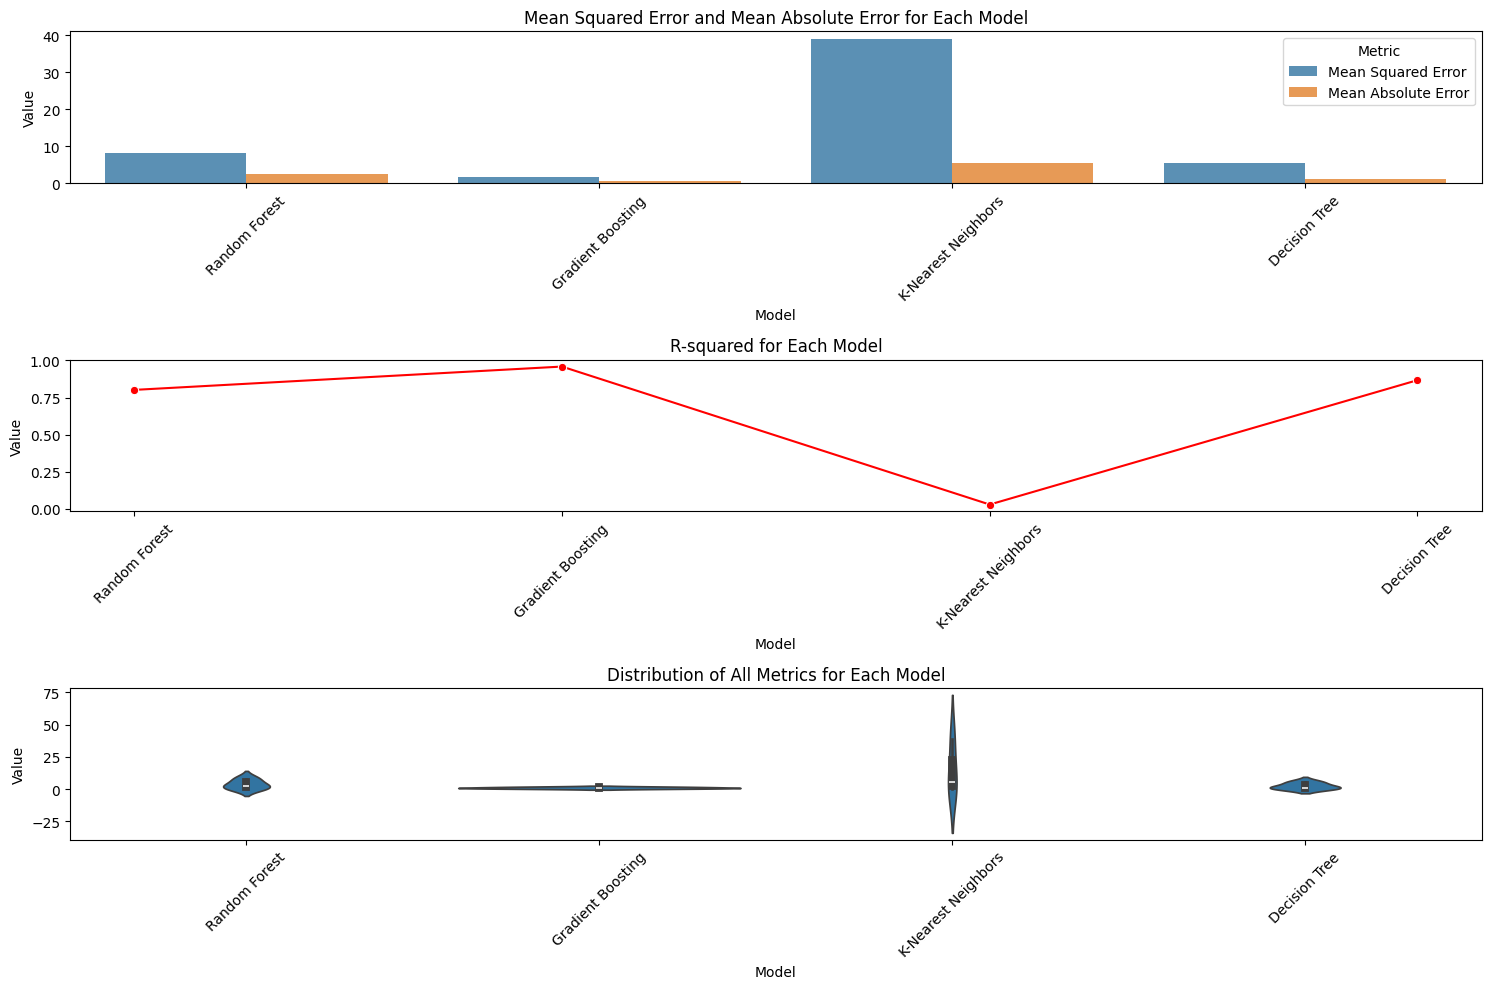

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dữ liệu metrics đã được cung cấp
data = {
    'Model': ['Random Forest', 'Gradient Boosting', 'K-Nearest Neighbors', 'Decision Tree'],
    'Mean Squared Error': [8.0, 1.681818, 39.045455, 5.363636],
    'Mean Absolute Error': [2.363636, 0.5, 5.5, 1.0],
    'R-squared': [0.801242, 0.958216, 0.029927, 0.866742]
}

metrics_summary = pd.DataFrame(data)

# Chuyển đổi DataFrame để dễ dàng vẽ biểu đồ
metrics_summary_melted = metrics_summary.melt(id_vars='Model', var_name='Metric', value_name='Value')

# Vẽ biểu đồ cho tất cả metrics
plt.figure(figsize=(15, 10))

# Biểu đồ cột cho MSE và MAE
plt.subplot(3, 1, 1)
sns.barplot(x='Model', y='Value', hue='Metric', data=metrics_summary_melted[metrics_summary_melted['Metric'].isin(['Mean Squared Error', 'Mean Absolute Error'])], alpha=0.8)
plt.title('Mean Squared Error and Mean Absolute Error for Each Model')
plt.ylabel('Value')
plt.xticks(rotation=45)

# Biểu đồ đường cho R-squared
plt.subplot(3, 1, 2)
sns.lineplot(x='Model', y='Value', data=metrics_summary_melted[metrics_summary_melted['Metric'] == 'R-squared'], marker='o', color='red')
plt.title('R-squared for Each Model')
plt.ylabel('Value')
plt.xticks(rotation=45)

# Biểu đồ violin cho tất cả metrics
plt.subplot(3, 1, 3)
sns.violinplot(x='Model', y='Value', data=metrics_summary_melted)
plt.title('Distribution of All Metrics for Each Model')
plt.ylabel('Value')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [35]:
results_summary_new = pd.DataFrame({'Actual Ranks': target})

# Chia dữ liệu thành tập huấn luyện và kiểm tra

X_train, X_test, y_train, y_test = train_test_split(features_scale, target, test_size=0.2, random_state=42)

# Huấn luyện mô hình trên tập huấn luyện và dự đoán cho toàn bộ dữ liệu
for model_name, model in models.items():
    model.fit(X_train, y_train)

    # Dự đoán cho toàn bộ tập dữ liệu (features)
    predictions = model.predict(features)

    # Làm tròn dự đoán
    predictions = np.round(predictions)

    # Lưu kết quả dự đoán vào DataFrame
    results_summary_new[model_name] = predictions

# In ra bảng kết quả dự đoán cho tất cả các mô hình
print("\nResults Summary for All Models:")
print(results_summary_new)



Results Summary for All Models:
    Actual Ranks  Random Forest  Gradient Boosting  K-Nearest Neighbors  \
0              6            7.0                2.0                  4.0   
1             17           10.0                7.0                 12.0   
2             12            9.0                7.0                  5.0   
3             11           10.0                7.0                  8.0   
4             21            8.0                4.0                  6.0   
5              8            7.0                2.0                  5.0   
6              5            7.0                2.0                  3.0   
7             14            7.0                2.0                  9.0   
8             10            7.0                5.0                  4.0   
9             19            7.0                3.0                  6.0   
10             3            7.0                2.0                  4.0   
11            16            7.0                2.0                 

c:\Users\ASUS\miniconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\ASUS\miniconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
c:\Users\ASUS\miniconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
c:\Users\ASUS\miniconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chuyển đổi DataFrame để dễ dàng vẽ biểu đồ
metrics_summary_melted = metrics_summary.melt(id_vars='Model', var_name='Metric', value_name='Value')

# Vẽ biểu đồ cho tất cả metrics
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

([0, 1, 2, 3],
 [Text(0, 0, 'Random Forest'),
  Text(1, 0, 'Gradient Boosting'),
  Text(2, 0, 'K-Nearest Neighbors'),
  Text(3, 0, 'Decision Tree')])

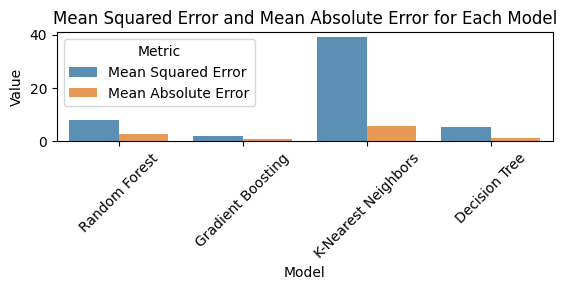

In [37]:
# Biểu đồ cột cho MSE và MAE
plt.subplot(3, 1, 1)
sns.barplot(x='Model', y='Value', hue='Metric', data=metrics_summary_melted[metrics_summary_melted['Metric'].isin(['Mean Squared Error', 'Mean Absolute Error'])], alpha=0.8)
plt.title('Mean Squared Error and Mean Absolute Error for Each Model')
plt.ylabel('Value')
plt.xticks(rotation=45)

([0, 1, 2, 3],
 [Text(0, 0, 'Random Forest'),
  Text(1, 0, 'Gradient Boosting'),
  Text(2, 0, 'K-Nearest Neighbors'),
  Text(3, 0, 'Decision Tree')])

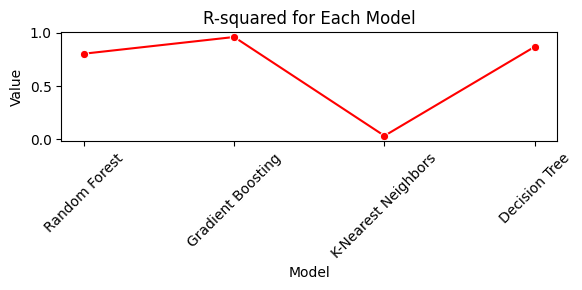

In [38]:
# Biểu đồ đường cho R-squared
plt.subplot(3, 1, 2)
sns.lineplot(x='Model', y='Value', data=metrics_summary_melted[metrics_summary_melted['Metric'] == 'R-squared'], marker='o', color='red')
plt.title('R-squared for Each Model')
plt.ylabel('Value')
plt.xticks(rotation=45)

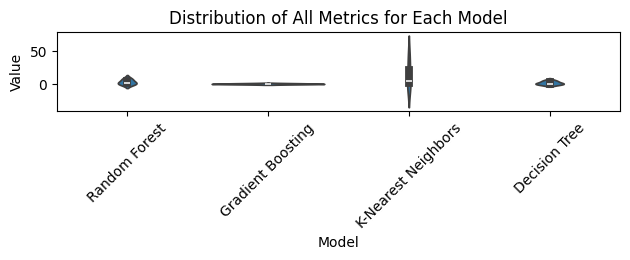

In [39]:
# Biểu đồ violin cho tất cả metrics
plt.subplot(3, 1, 3)
sns.violinplot(x='Model', y='Value', data=metrics_summary_melted)
plt.title('Distribution of All Metrics for Each Model')
plt.ylabel('Value')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 3.Optimization


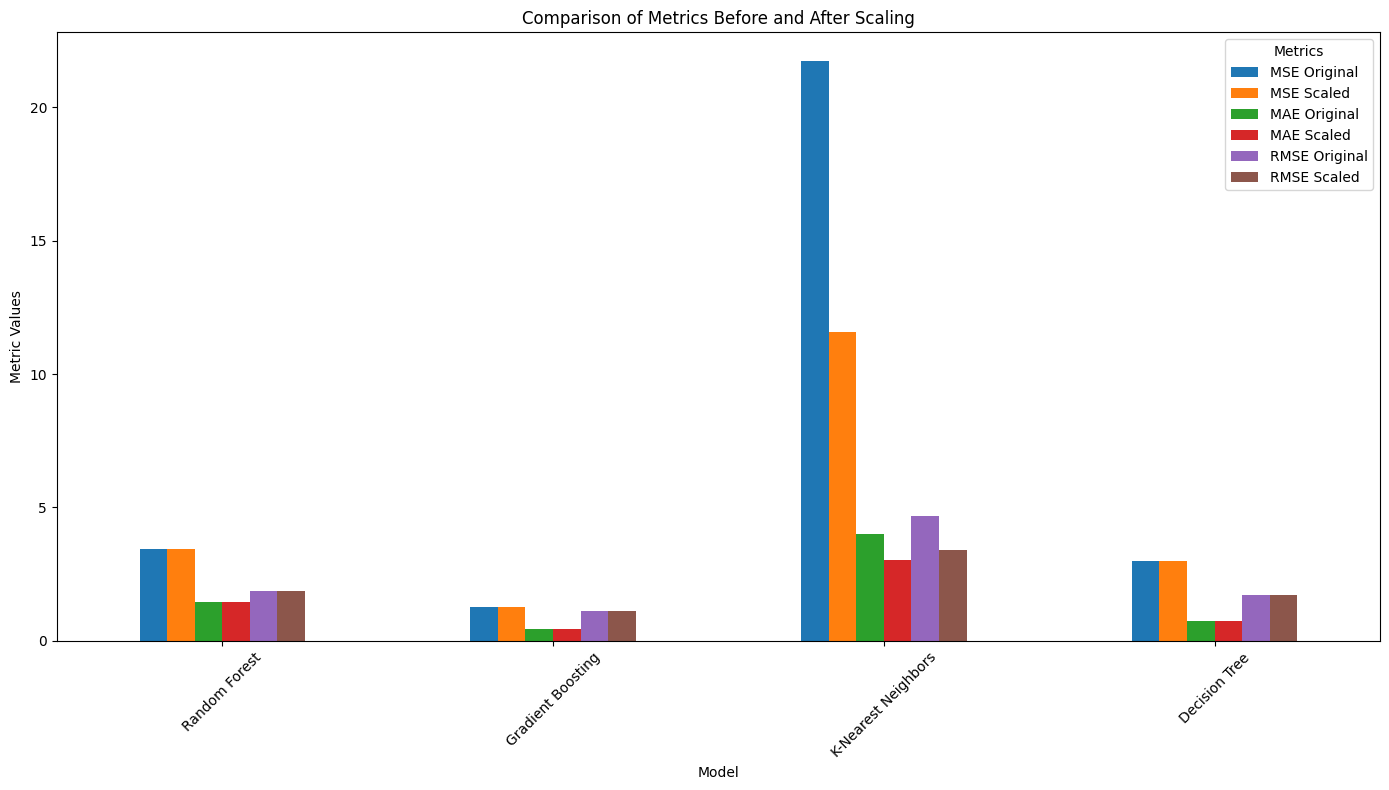

In [40]:
def calculate_metrics(features, target):
    metrics_list = []

    # Chia dữ liệu thành tập huấn luyện và kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(features)
        predictions = np.round(predictions)

        mse = mean_squared_error(target, predictions)
        mae = mean_absolute_error(target, predictions)
        r2 = r2_score(target, predictions)
        rmse = np.sqrt(mse)

        metrics_list.append({
            'Model': model_name,
            'Mean Squared Error': mse,
            'Mean Absolute Error': mae,
            'R-squared': r2,
            'Root Mean Squared Error': rmse
        })

    return pd.DataFrame(metrics_list)

# Tính toán metrics cho dữ liệu gốc
metrics_original = calculate_metrics(features, target)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Tính toán metrics cho dữ liệu đã chuẩn hóa
metrics_scaled = calculate_metrics(features_scaled, target)

# So sánh metrics
comparison_summary = pd.merge(metrics_original, metrics_scaled, on='Model', suffixes=('_Original', '_Scaled'))

# Vẽ biểu đồ so sánh
metrics_to_plot = comparison_summary.set_index('Model')[['Mean Squared Error_Original', 'Mean Squared Error_Scaled',
                                                         'Mean Absolute Error_Original', 'Mean Absolute Error_Scaled',
                                                         'Root Mean Squared Error_Original', 'Root Mean Squared Error_Scaled']]

metrics_to_plot.plot(kind='bar', figsize=(14, 8))
plt.title('Comparison of Metrics Before and After Scaling')
plt.ylabel('Metric Values')
plt.xticks(rotation=45)
plt.legend(title='Metrics', labels=[
    'MSE Original', 'MSE Scaled',
    'MAE Original', 'MAE Scaled',
    'RMSE Original', 'RMSE Scaled'
])
plt.tight_layout()
plt.show()